Date: 2/11/2023 <br>
Author: Amparo Godoy Pastore

# Objective

The purpose of this notebook is to explore various computer assisted methods to predict the future behavior of a system from a knowledge of its dynamics.
This knowledge consists of a set of differential equations that relate the rate of change of the system's quantities to the current state of the system. In particular, I look at the coupled dynamics of two quantities $a$ and $b$ with the differential equation $\frac{da}{dt}=b, \frac{db}{dt}=-a$. 

# Preliminaries

In [144]:
import numpy as np               # Math and arrays.
from scipy.integrate import solve_ivp # ODE solving.
import matplotlib.pyplot as plt  # Plotting.
import vpython as vp             # 3D visualization.
import math as m

<div class="alert alert-block alert-danger">
<b>Task 1</b>  
</div>

Text(0.5, 1.0, "Figure 1. ODE: Euler's Method")

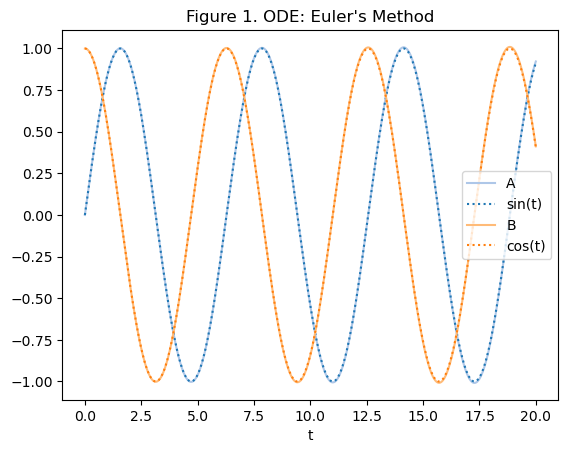

In [145]:
# First we define the differential equation, i.e.,
# we specify da/dt and db/dt as functions of a and b.
def dadt(a,b):
    return b * dt

def dbdt(a,b):
    return -a * dt

# Integrating from t=0 to t=20 with a step dt=0.1.
t0,t1,dt = 0,20,0.001
# Let the initial condition be a(0)=1, b(0)=0.
a0,b0 = 0,1

# Makes a list to record a,b,t at each step
# Filling it with the initial conditions.
T,A,B = [t0],[a0],[b0]

# Start the loop over the steps.
# Computing how many iterations we need.
n = int((t1-t0)/dt)
for i in range(n):
    # First we compute the changes to a and b during this time step.
    a,b,t = A[-1],B[-1],T[-1]
    da = dadt(a, b)
    db = dbdt(a, b)
    # Now we effect the changes and record the new values in the lists T,A,B.
    a,b,t = (a + da), (b + db), (t + dt)
    A.append(a)
    B.append(b)
    T.append(t)

# Now we plot a and b as a function of time as well
c = plt.colormaps["tab20"] #colors for plot
plt.plot(T, A, label = 'A', color = c(1))
plt.plot(T, np.sin(T), color = c(0), linestyle = ':', label = 'sin(t)')
plt.plot(T, B, label = 'B', color = c(3))
plt.plot(T, np.cos(T), color = c(2), linestyle = ':', label = 'cos(t)')
plt.legend()
plt.xlabel('t')
plt.title("Figure 1. ODE: Euler's Method")

Through trial-and-error I found that $dt = 0.001$ makes the difference smaller than $0.01$. Below is the approximation error at $t_1$ for a time step of $0.001$

In [146]:
# Compute the approximation error |a - sin(t)|
error = abs(A[-1] - np.sin(T[-1]))
print("Approximation error: ", error)

Approximation error:  0.00917249978945045


<div class="alert alert-block alert-danger">
<b>Task 2</b>  
</div>

Text(0.5, 1.0, "Figure 1. ODE: Euler's Method")

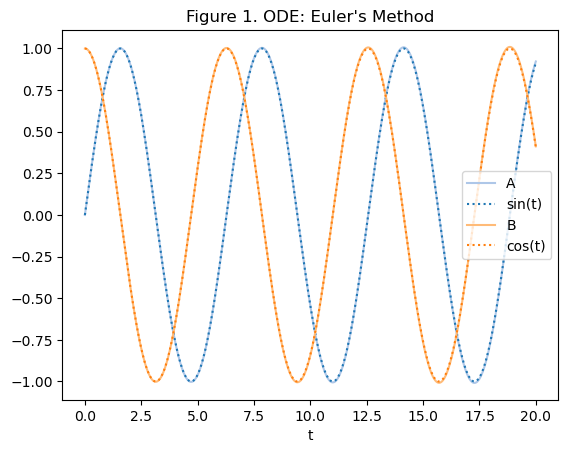

In [147]:
# Define the differential equation, i.e.,
# Put a(t) and b(t) together in a new "state" variable x(t) = (a(t), b(t))
def dxdt(x):
    a,b = x[0],x[1]
    return np.array([b, -a])
    
# Integrate from t=0 to t=20 with a step dt=0.1.
t0,t1,dt = 0,20,0.001
# Let the initial condition be x(0)=(0,1)
x0 = np.array([0,1])

# Set up the lists for t and x, filling them with the initial conditions
T,X = [t0],[x0]

# Compute number of iterations "n"
n = int((t1-t0)/dt)
for i in range(n):
    # Compute the changes to x during this time step.
    x,t = X[-1],T[-1]
    dx = dxdt(x)
    # Effect the changes and record the new values in the lists T,X.
    x = x+dx*dt
    t = t + dt
    X.append(x)
    T.append(t)
    
# Plot x as a function of time, as well
# as the exact solutions for comparison.

X = np.array(X) # Turn list into array for easier plotting

c = plt.colormaps["tab20"] #colors for plot
plt.plot(T, X[:,0], label = 'A', color = c(1), linestyle = 'solid')
plt.plot(T, np.sin(T), color = c(0), linestyle = 'dotted', label = 'sin(t)')
plt.plot(T, X[:,1], label = 'B', color = c(3))
plt.plot(T, np.cos(T), color = c(2), linestyle = 'dotted', label = 'cos(t)')
plt.legend()
plt.xlabel('t')
plt.title("Figure 1. ODE: Euler's Method")

Now, I am verifying that the obtained results using the "state variable" $x$ are equal to the first attemp, where $a(t)$ and $b(t)$ are not grouped together. 

In [148]:
# Check it yields the same results as task 1
if np.all(A == X[:,0]) and np.all(B == X[:,1]):
    print("Results are equal")
else:
    print("Results are not equal")


Results are equal


<div class="alert alert-block alert-danger">
<b>Task 3</b>  
</div>

Text(0.5, 1.0, 'Figure 2. ODE: RK2 Method')

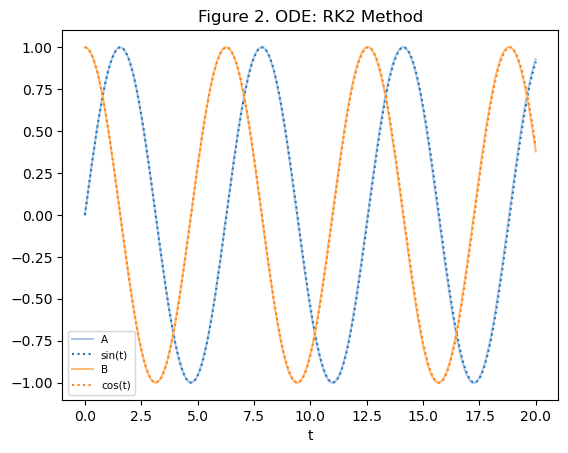

In [149]:
# Define the differential equation, i.e.,
# Put a(t) and b(t) together in a new "state" variable x(t) = (a(t), b(t))
def dxdt(x):
    a,b = x[0],x[1]
    return np.array([b, -a])
    
# Integrate from t=0 to t=20 with a step dt=0.1.
t0,t1,dt = 0,20,0.1
# Let the initial condition be x(0)=(0,1)
x0 = np.array([0,1])

# Set up the lists for t and x, filling them with the initial conditions
T,X = [t0],[x0]

# Compute number of iterations "n"
n = int((t1-t0)/dt)
for i in range(n):
    # Compute the changes to x during this time step.
    x,t = X[-1],T[-1]
    dx = dxdt(x)
    # Effect the changes and record the new values in the lists T,X.
    x = x + dxdt(x + dxdt(x) * (dt/2)) * dt # Using x to obtain a better estimate of the new x value
    t = t + dt
    X.append(x)
    T.append(t)
    
# Plot x as a function of time, as well
# as the exact solutions for comparison.

X = np.array(X) # Turn list into array for easier plotting

c = plt.colormaps["tab20"] #colors for plot
plt.plot(T, X[:,0], label = 'A', color = c(1), linestyle = 'solid')
plt.plot(T, np.sin(T), color = c(0), linestyle = 'dotted', label = 'sin(t)')
plt.plot(T, X[:,1], label = 'B', color = c(3))
plt.plot(T, np.cos(T), color = c(2), linestyle = 'dotted', label = 'cos(t)')
plt.legend(fontsize=7.5)
plt.xlabel('t')
plt.title("Figure 2. ODE: RK2 Method")

Shown below is the approximation error (at the end of integration, that is $t_1$) of the RK2 method using a time step of $dt = 0.1$. 

In [150]:
# Calculate RK2 accuracy
error = abs(X[-1][0] - np.sin(T[-1]))
print("Approximation error: ", error)

Approximation error:  0.015373058036528775


<div class="alert alert-block alert-danger">
<b>Task 4</b>  
</div>

Text(0.5, 1.0, 'Figure 3. ODE: RK45 with solve_ivp')

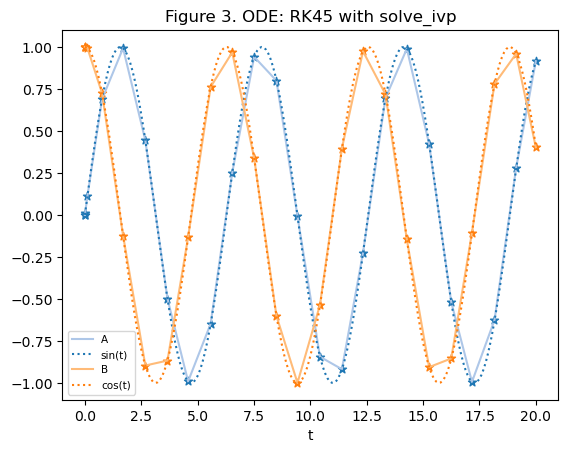

In [151]:
# The differential equation function now takes t as an argument
# so that it's compatible with solve_ivp
def dxdt(t, x):
    a,b = x[0],x[1]
    return np.array([b, -a])

# Integrate from t=0 to t=20 with a step dt=0.1.
t0,t1,dt = 0,20,0.1
# Let the initial condition be x(0)=(0,1)
x0 = np.array([0,1])

# List times to plot sin and cos 
T = np.linspace(t0, t1, int(t1/dt))

# Using RK45 from spicy's solve_ivp
sol = solve_ivp(dxdt, [t0, t1], x0)

# Plot results from spicy's solve_ivp & the true sin and cos 
c = plt.colormaps["tab20"] #colors for plot
plt.scatter(sol.t, sol.y[0], marker = '*')
plt.scatter(sol.t, sol.y[1], marker = '*')
plt.plot(sol.t, sol.y[0], label = 'A', color = c(1))
plt.plot(T, np.sin(T), color = c(0), linestyle = ':', label = 'sin(t)')
plt.plot(sol.t, sol.y[1], label = 'B', color = c(3))
plt.plot(T, np.cos(T), color = c(2), linestyle = ':', label = 'cos(t)')
plt.legend(fontsize=7.5)
plt.xlabel('t')
plt.title('Figure 3. ODE: RK45 with solve_ivp')

_Figure 3_ shows the results from Scipy's solve_ivp which assesses the error committed at each step and adjusts the time step accordingly. Below I compute the error at $t = 20$. 

In [152]:
# Calculate RK45 accuracy
error = abs(sol.y[0][-1] - np.sin(sol.t[-1]))
print("Approximation error: ", error)

Approximation error:  0.002115778884773545


<div class="alert alert-block alert-danger">
<b>Task 5</b>  
</div>

Text(0.5, 1.0, 'Figure 4. ODE: RK45 with solve_ivp & t evaluation')

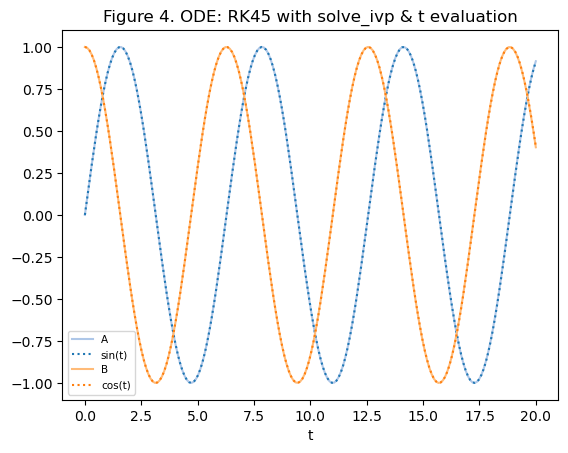

In [153]:
# The differential equation function now takes t as an argument
# so that it's compatible with solve_ivp
def dxdt(t, x):
    a,b = x[0],x[1]
    return np.array([b, -a])

# Integrate from t=0 to t=20 with a step dt=0.1.
t0,t1,dt = 0,20,0.1
# Let the initial condition be x(0)=(0,1)
x0 = np.array([0,1])

# List times to plot sin and cos 
T = np.linspace(t0, t1, int(t1/dt))

# Using RK45 from spicy's solve_ivp & t_eval option for smoother curve 
sol = solve_ivp(dxdt, [t0, t1], x0, t_eval=T)

# Plot results from spicy's solve_ivp
c = plt.colormaps["tab20"] #colors for plot
plt.plot(sol.t, sol.y[0], label = 'A', color = c(1))
plt.plot(T, np.sin(T), color = c(0), linestyle = ':', label = 'sin(t)')
plt.plot(sol.t, sol.y[1], label = 'B', color = c(3))
plt.plot(T, np.cos(T), color = c(2), linestyle = ':', label = 'cos(t)')
plt.legend(fontsize=7.5)
plt.xlabel('t')
plt.title('Figure 4. ODE: RK45 with solve_ivp & t evaluation')

# Conclusion

The purpose of this notebook was to explore various computer assisted methods to predict the future behavior of a system from a knowledge of its dynamics. This knowledge consists of a set of differential equations that relate the rate of change of the system's quantities to the current state of the system. In particular, I looked at the coupled dynamics of two quantities $a$ and $b$ with the differential equation $\frac{da}{dt}=b, \frac{db}{dt}=-a$. 

The first approach was Euler's method, which starts from the initial condition and advances the solution through time by $dt$ using a first order Taylor approximation. _Figure 1_ shows the result of performing Euler's method with a time step of 0.001. Smaller time steps improve the accuracy significantly. When performed using $dt = 0.1$, the approximation error per step becomes visibly larger, reaching an inaccuracy of $\approx1.48$ at $t = 20$. In contrast, the error with $dt = 0.001$ is $<0.01$. This is to be expected since in Euler's method the error per step is proportional to $dt^2$. 
Combining the two numbers $a(t)$ and $b(t)$ that define the system at time $t$ into a single "state variable" $x$ that fully describes the system yields the same results and allows for a more condense calculation of the ODE solution.

Next, I used the RK2 method which is second-order accurate or proportional to $dt^3$. This method allowed me to obtain almost the same accuracy, but with a much larger step size. At $t_1$ and with $dt = 0.1$ the error was $\approx0.015$. Compared to the $\approx0.009$ error obtained using Euler's method with $dt = 0.001$, RK2 is much more accurate. It is also a lot more efficient, as smaller time steps may slow down the program.

The last approach implemented was Scipy's solve_ivp which adjusts time steps to compensate for the error commited at each step and is thus much more accurate than RK2. As shown in _Figure 3_ this adaptive time step scheme allows for an even larger step size while maintaining accuracy. At $t = 20$ the solve_ivp results had an approximation error of $\approx0.002$, the most accurate out of all of the attempted methods. Since the time step is a lot larger, I used the t_eval option to get a smoother curve.

Even though for this specific differential equation system, all three methods were able to produce almost the same level of accuracy,  none of them did it as efficiently as Scipy's solve_ivp which achieved the least amount of error with largest time step. 